In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder as labelencoder
from sklearn.preprocessing import normalize

In [2]:
df = pd.read_csv("/content/Mall_Customers.csv")

In [3]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df.drop("CustomerID",axis=1,inplace=True)

In [5]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [6]:
df.isnull().sum()

,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [7]:
df.isna().sum()

,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [8]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [10]:
# Create a Plotly figure with before and after outlier removal
fig = go.Figure()

# Before outlier removal
fig.add_trace(go.Scatter(
    x=df['Annual Income (k$)'],
    y=df['Spending Score (1-100)'],
    mode='markers',
    name='Before Outlier Removal',
    marker=dict(color='blue')
))

In [11]:
# prompt: give me a plotly figure to show the outliers after and before

# Calculate IQR for 'Annual Income (k$)'
Q1 = df['Annual Income (k$)'].quantile(0.25)
Q3 = df['Annual Income (k$)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Annual Income (k$)'] < lower_bound) | (df['Annual Income (k$)'] > upper_bound)]

# Create a copy of the DataFrame to mark outliers
df_with_outliers = df.copy()
df_with_outliers['Outlier'] = 'No'
df_with_outliers.loc[outliers.index, 'Outlier'] = 'Yes'

In [12]:
# After outlier removal (remove outliers)
df_no_outliers = df[(df['Annual Income (k$)'] >= lower_bound) & (df['Annual Income (k$)'] <= upper_bound)]
fig.add_trace(go.Scatter(
    x=df_no_outliers['Annual Income (k$)'],
    y=df_no_outliers['Spending Score (1-100)'],
    mode='markers',
    name='After Outlier Removal',
    marker=dict(color='green')
))


fig.update_layout(
    title='Outliers in Annual Income vs Spending Score',
    xaxis_title='Annual Income (k$)',
    yaxis_title='Spending Score (1-100)'
)

fig.show()

# Feature Selection

In [13]:
le = labelencoder()
df['Gender'] = le.fit_transform(df['Gender'])

In [14]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
X_scaled=normalize(X)
X_scaled

array([[0.35897908, 0.93334561],
       [0.18208926, 0.983282  ],
       [0.93632918, 0.35112344],
       [0.20344646, 0.97908607],
       [0.39114064, 0.92033092],
       [0.21828984, 0.97588398],
       [0.9486833 , 0.31622777],
       [0.18807227, 0.98215519],
       [0.98776297, 0.15596257],
       [0.25515426, 0.96690036],
       [0.80505584, 0.59319904],
       [0.18847945, 0.98207713],
       [0.8       , 0.6       ],
       [0.25139836, 0.9678837 ],
       [0.83844362, 0.54498835],
       [0.24542187, 0.96941637],
       [0.51449576, 0.85749293],
       [0.30320366, 0.95292578],
       [0.62139471, 0.78349768],
       [0.22848559, 0.97354729],
       [0.56552836, 0.82472885],
       [0.31232107, 0.9499766 ],
       [0.98058068, 0.19611614],
       [0.32399297, 0.94605949],
       [0.89442719, 0.4472136 ],
       [0.32314385, 0.94634986],
       [0.65850461, 0.75257669],
       [0.41716766, 0.90882955],
       [0.68315713, 0.73027141],
       [0.31622777, 0.9486833 ],
       [0.

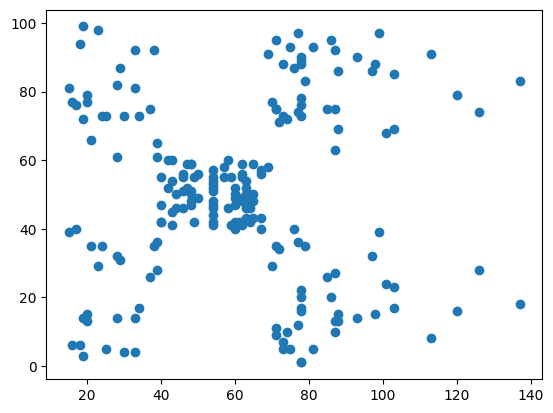

In [15]:
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])
plt.show()

In [16]:
final= df.iloc[:, [2,3]].values
final

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [17]:
inertia_list = []
n = 11
for i in range(1, n):
    km = KMeans(n_clusters=i)
    km.fit_predict(final)
    inertia_list.append(km.inertia_)

In [18]:
fig = go.Figure(data=go.Scatter(x=list(range(1, n)), y=inertia_list))
fig.update_layout(
    title="Elbow",
    xaxis_title="Clusters",
    yaxis_title="Inertias"
)
fig.show()

In [19]:
km=KMeans(n_clusters=5)
y_pred=km.fit_predict(final)
y_pred

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [20]:
inertia_list

[269981.28000000014,
 183653.3289473683,
 106348.37306211119,
 73880.64496247198,
 44454.47647967972,
 37233.81451071002,
 34692.33302795602,
 28414.22834868619,
 24496.81318201318,
 21041.811366153237]

In [21]:
df['Cluster']=y_pred
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,19,15,39,4
1,1,21,15,81,2
2,0,20,16,6,4
3,0,23,16,77,2
4,0,31,17,40,4
...,...,...,...,...,...
195,0,35,120,79,1
196,0,45,126,28,3
197,1,32,126,74,1
198,1,32,137,18,3


In [22]:
import plotly.express as px

fig = px.scatter(df, x="Annual Income (k$)", y="Spending Score (1-100)", color="Cluster")
fig.add_trace(go.Scatter(
    x=km.cluster_centers_[:,0],
    y=km.cluster_centers_[:,1],
    mode='markers',
    name='Centroids',
    marker=dict(color='yellow', size=10)
))
fig.show()